In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

df = pd.read_csv('ph_dengue_cases2016-2020.csv')

In [ ]:
print(df)

          Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]


DATA CLEANING

In [3]:
print(df.duplicated().sum())

print(df.isnull().sum())

0
Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64


In [7]:
df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [10]:
mean_cases = df['Dengue_Cases'].mean()
median_cases = df['Dengue_Cases'].median()

mean_deaths = df['Dengue_Deaths'].mean()
median_deaths = df['Dengue_Deaths'].median()

print(mean_cases)
print(median_cases)

print(mean_deaths)
print(median_deaths)


1124.9264705882354
582.5
16.51372549019608
3.0


In [15]:

std_cases = df['Dengue_Cases'].std()
std_deaths = df['Dengue_Deaths'].std()

var_cases = df['Dengue_Cases'].var()
var_deaths = df['Dengue_Deaths'].var()

print(std_cases)
print(std_deaths)

print(var_cases)
print(var_deaths)

1662.608877686575
96.35821501779819
2764268.2801622124
9284.905601416227


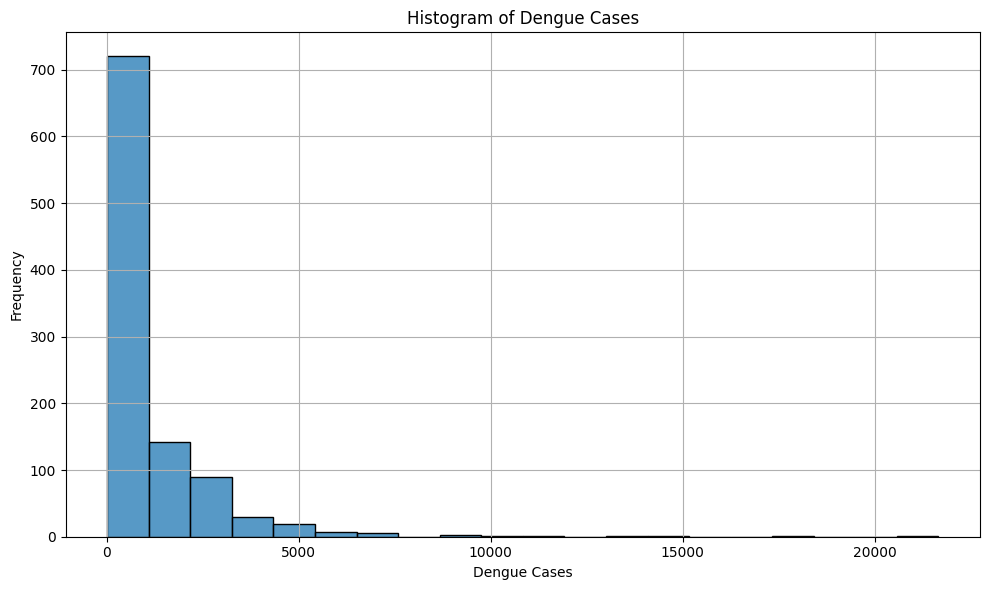

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Dengue_Cases', bins=20, kde=False, edgecolor='black')
plt.title('Histogram of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.grid(True)  

plt.tight_layout()
plt.show()

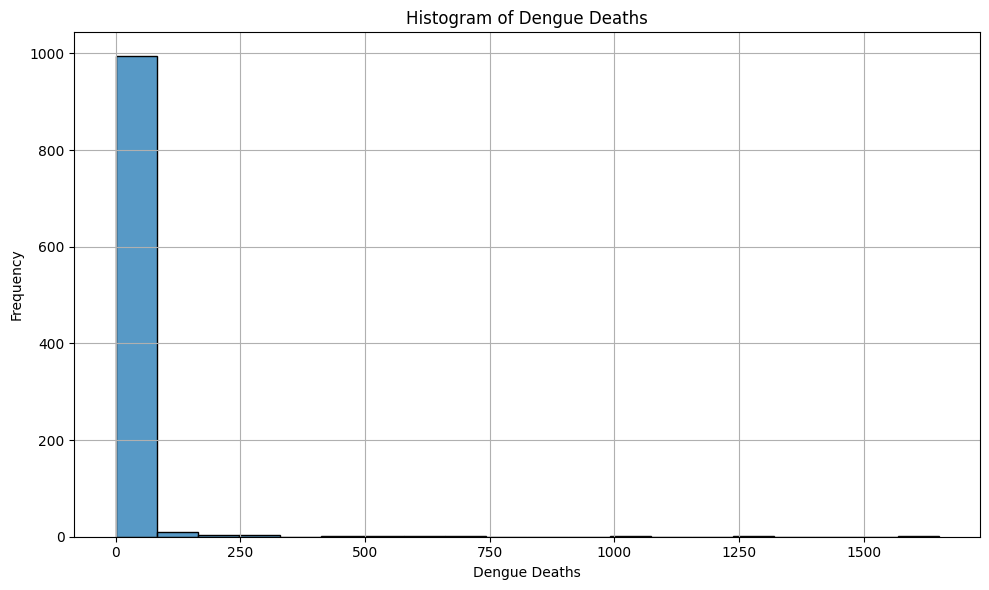

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Dengue_Deaths', bins=20, kde=False, edgecolor='black')
plt.title('Histogram of Dengue Deaths')
plt.xlabel('Dengue Deaths')
plt.ylabel('Frequency')
plt.grid(True) 

plt.tight_layout()
plt.show()

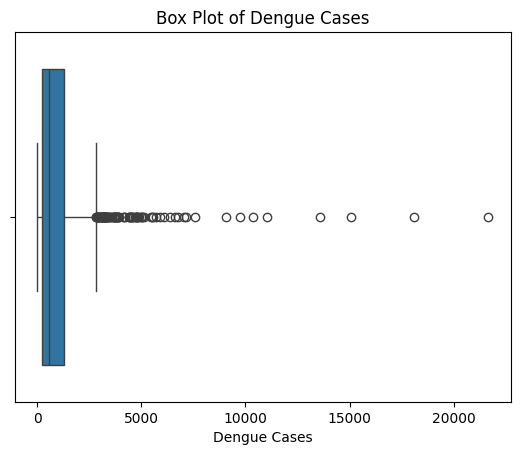

In [20]:
sns.boxplot(x=df['Dengue_Cases'])
plt.title('Box Plot of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.show()

C:\Users\New User\AppData\Local\Temp\ipykernel_7752\687339344.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean_cases = df.groupby('Month')['Dengue_Cases'].median()


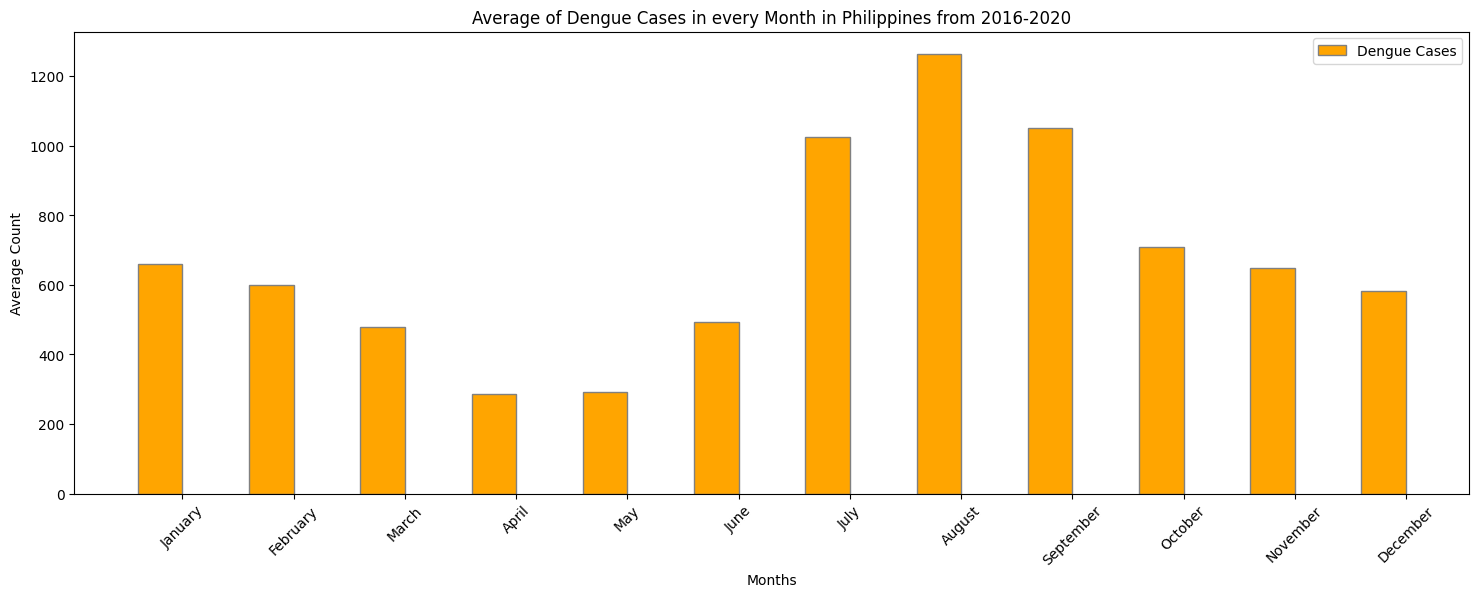

In [38]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_mean_cases = df.groupby('Month')['Dengue_Cases'].median()

plt.figure(figsize=(18,6))
bar_width = 0.4
months = monthly_mean_cases.index.astype(str)

r1 = range(len(months))
r2 = [x + bar_width for x in r1]

plt.bar(r1, monthly_mean_cases, color='orange', width=bar_width, edgecolor='grey', label='Dengue Cases')
plt.title('Average of Dengue Cases in every Month in Philippines from 2016-2020')
plt.xlabel('Months')
plt.ylabel('Average Count')
plt.xticks([r + bar_width / 2 for r in range(len(months))], months, rotation=45)
plt.legend()
plt.show()

C:\Users\New User\AppData\Local\Temp\ipykernel_7752\1069254218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean_deaths = df.groupby('Month')['Dengue_Deaths'].median()


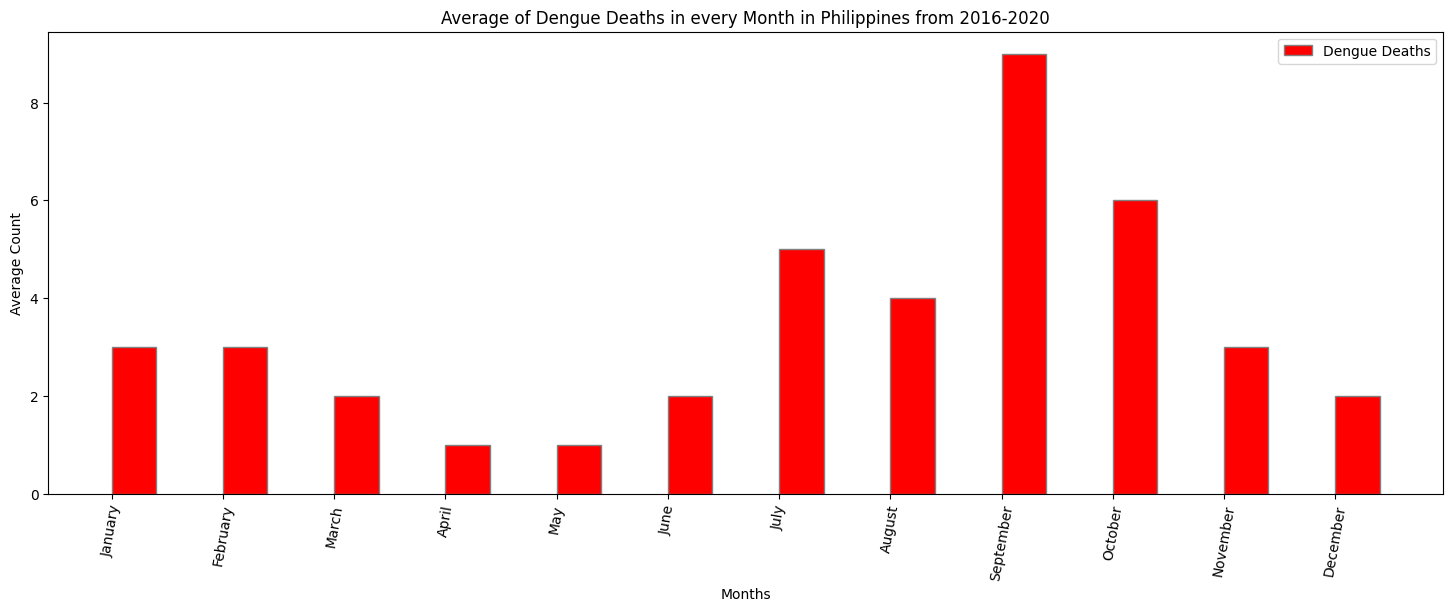

In [39]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_mean_deaths = df.groupby('Month')['Dengue_Deaths'].median()

plt.figure(figsize=(18,6))
bar_width = 0.4
months = monthly_mean_deaths.index.astype(str)

r1 = range(len(months))
r2 = [x + bar_width for x in r1]

plt.bar(r2, monthly_mean_deaths, color='red', width=bar_width, edgecolor='grey', label='Dengue Deaths')

plt.title('Average of Dengue Deaths in every Month in Philippines from 2016-2020')
plt.xlabel('Months')
plt.ylabel('Average Count')
plt.xticks([r + bar_width / 2 for r in range(len(months))], months, rotation=80)
plt.legend()
plt.show()

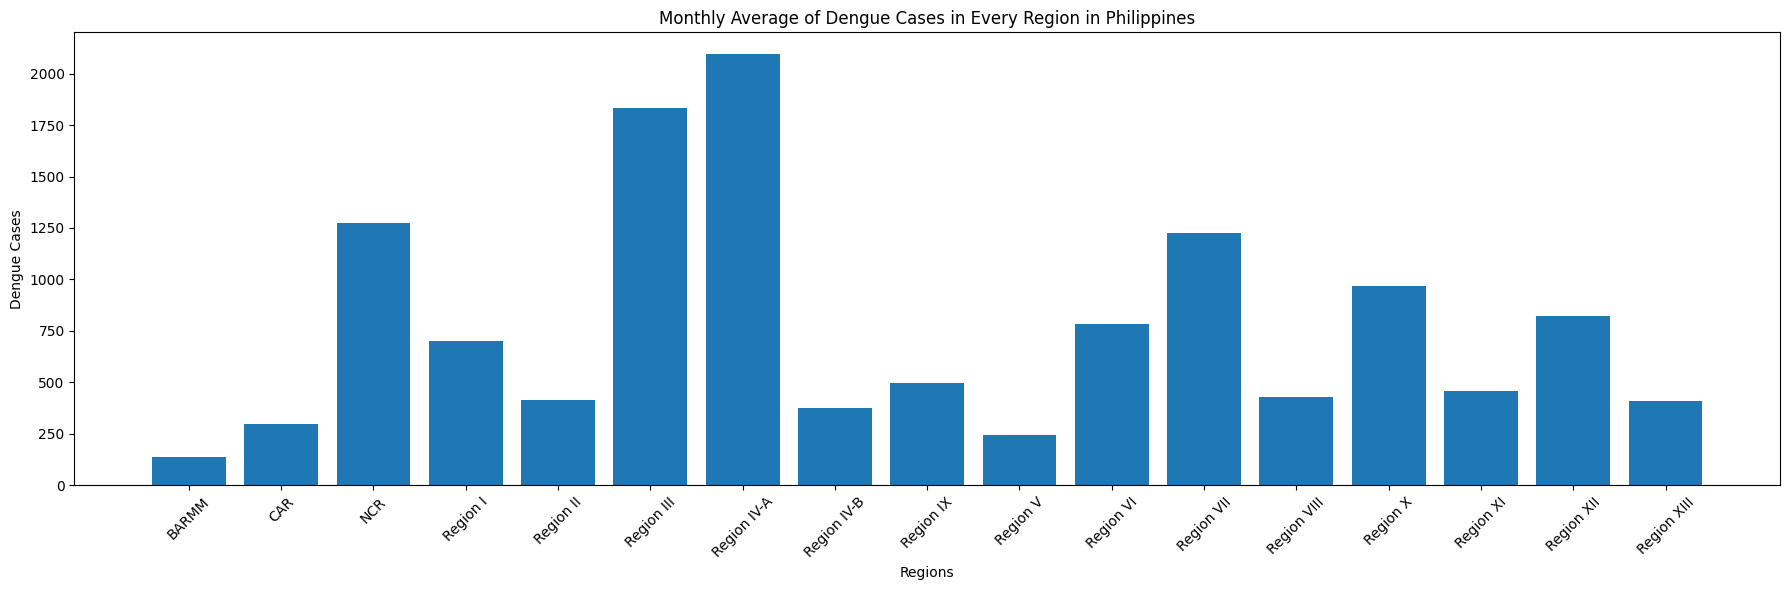

In [63]:
region_cases = df.groupby('Region')['Dengue_Cases'].median()

regions = region_cases.index
cases = region_cases.values

plt.figure(figsize=(18, 6))
plt.bar(regions, cases)
plt.title('Monthly Average of Dengue Cases in Every Region in Philippines')
plt.xlabel('Regions')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

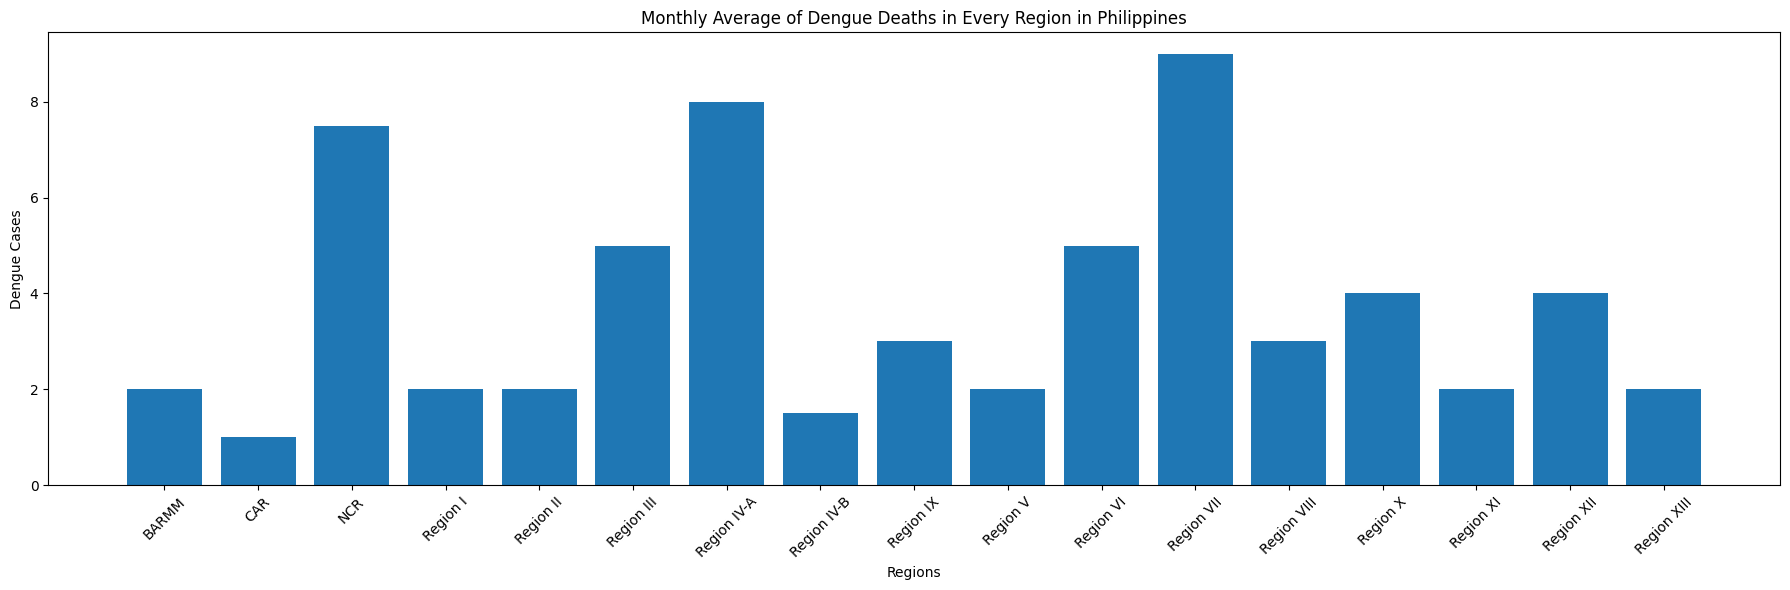

In [64]:
region_cases = df.groupby('Region')['Dengue_Deaths'].median()

regions = region_cases.index
cases = region_cases.values

plt.figure(figsize=(18, 6))
plt.bar(regions, cases)
plt.title('Monthly Average of Dengue Deaths in Every Region in Philippines')
plt.xlabel('Regions')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

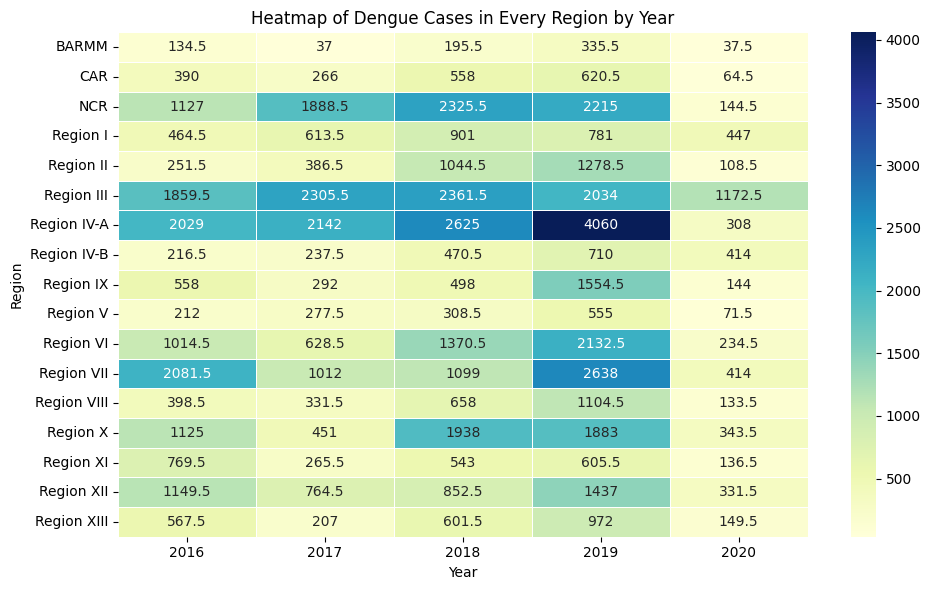

In [16]:
heatmap_data = df.pivot_table(index='Region', columns='Year', values='Dengue_Cases', aggfunc='median')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Heatmap of Dengue Cases in Every Region by Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

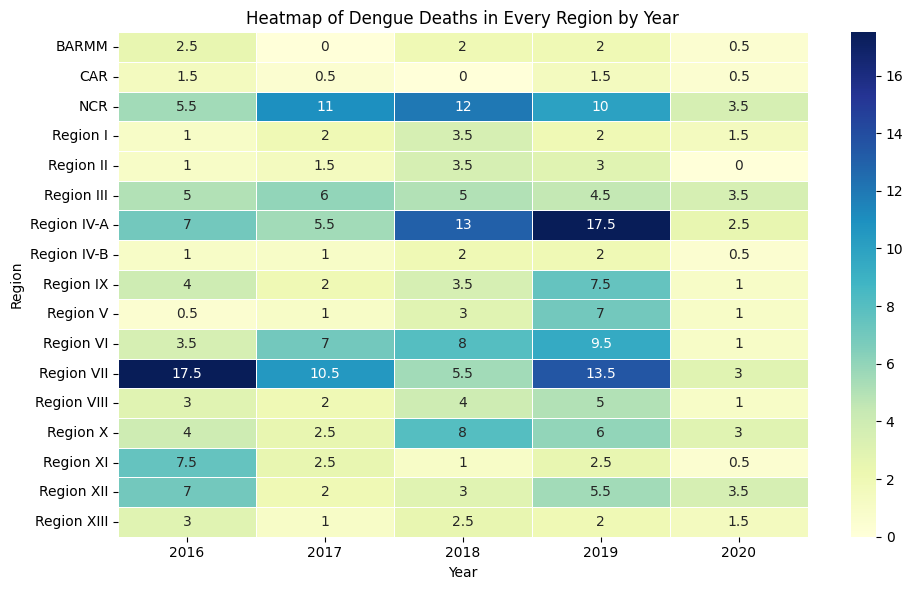

In [19]:
heatmap_data = df.pivot_table(index='Region', columns='Year', values='Dengue_Deaths', aggfunc='median')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Heatmap of Dengue Deaths in Every Region by Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

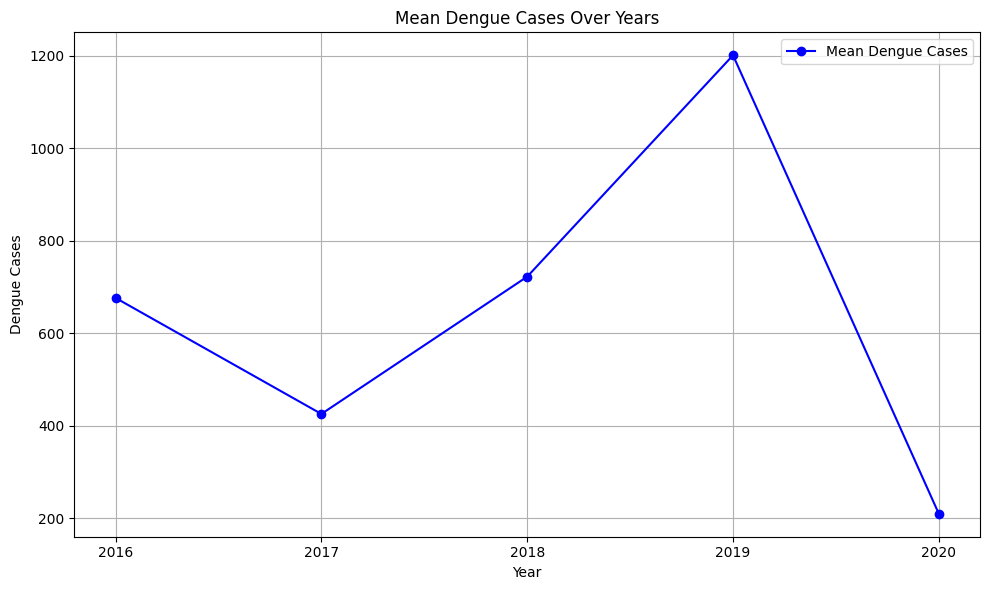

In [74]:
mean_dengue_cases = df.groupby('Year')['Dengue_Cases'].median()

plt.figure(figsize=(10, 6))
plt.plot(mean_dengue_cases.index, mean_dengue_cases.values, marker='o', linestyle='-', color='b', label='Mean Dengue Cases')
plt.title('Mean Dengue Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

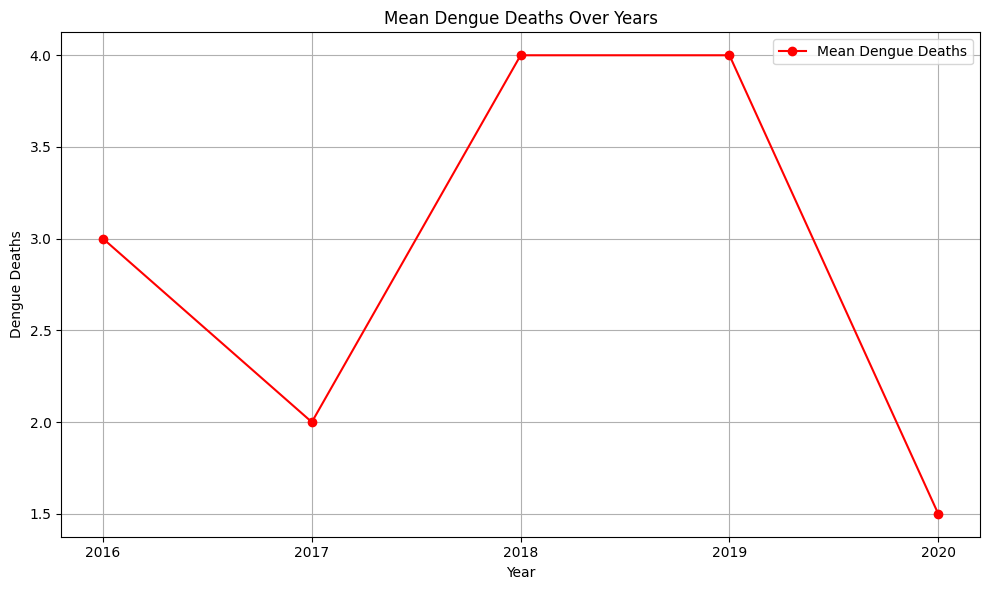

In [72]:
mean_dengue_cases = df.groupby('Year')['Dengue_Deaths'].median()

# Plotting the mean Dengue cases over years
plt.figure(figsize=(10, 6))
plt.plot(mean_dengue_cases.index, mean_dengue_cases.values, marker='o', linestyle='-', color='r', label='Mean Dengue Deaths')
plt.title('Mean Dengue Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
anova_result = stats.f_oneway(
    df[df['Month'] == 'January']['Dengue_Cases'],
    df[df['Month'] == 'February']['Dengue_Cases'],
    df[df['Month'] == 'March']['Dengue_Cases'],
    df[df['Month'] == 'April']['Dengue_Cases'],
    df[df['Month'] == 'May']['Dengue_Cases'],
    df[df['Month'] == 'June']['Dengue_Cases'],
    df[df['Month'] == 'July']['Dengue_Cases'],
    df[df['Month'] == 'August']['Dengue_Cases'],
    df[df['Month'] == 'September']['Dengue_Cases'],
    df[df['Month'] == 'October']['Dengue_Cases'],
    df[df['Month'] == 'November']['Dengue_Cases'],
    df[df['Month'] == 'December']['Dengue_Cases']
)

print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=12.561409084080761, pvalue=1.6916026551886692e-22)
